Christian Mariano

Caleb Villegas

Lab 2: Naive Bayes Classification

11/07/2024

Part 1:

1. Downloaded

2 and 3.

Vector 1:

(price: medium, maintenance: low_cost, trunk: big, safety: poor)

For Class LOW:

P(LOW) * P(price = medium | LOW) * P(maintenance = low_cost | LOW) * P(trunk = big | LOW) * P(safety = poor | LOW)

Using the values:

12/25 * 5/12 * 0.01/12 * 2/12 * 5/12 = 0.000012

For Class HIGH:

P(HIGH) * P(price = medium | HIGH) * P(maintenance = low_cost | HIGH) * P(trunk = big | HIGH) * P(safety = poor | HIGH)

Using the values:

13/25 * 1/13 * 5/13 * 5/13 * 1/13 = 0.00044

**Classification: HIGH**

Vector 2:

(price: high, maintenance: low_cost, trunk: big, safety: good)

For Class LOW:

   P(LOW) * P(price = high | LOW) * P(maintenance = low_cost | LOW) * P(trunk = big | LOW) * P(safety = good | LOW)
   
   Using the values:

   12/25 * 3/12 * 0.01/12 * 2/12 * 2/12 = 0.000003

For Class HIGH:

   P(HIGH) * P(price = high | HIGH) * P(maintenance = low_cost | HIGH) * P(trunk = big | HIGH) * P(safety = good | HIGH)
   
   Using the values:

   13/25 * 4/13 * 5/13 * 5/13 * 8/13 = 0.01456

**Classification: HIGH**

Vector 3:

(price: high, maintenance: high_cost, trunk: big, safety: good)

For Class LOW:

   P(LOW) * P(price = high | LOW) * P(maintenance = high_cost | LOW) * P(trunk = big | LOW) * P(safety = good | LOW)
   
   Using the values:

   12/25 * 3/12 * 4/12 * 2/12 * 2/12 = 0.0011

For Class HIGH:

   P(HIGH) * P(price = high | HIGH) * P(maintenance = high_cost | HIGH) * P(trunk = big | HIGH) * P(safety = good | HIGH)
   
   Using the values:

   13/25 * 4/13 * 3/13 * 5/13 * 8/13 = 0.01456

**Classification: HIGH**

Vector 4:

(price: low, maintenance: high_cost, trunk: small, safety: ave)

For Class LOW:

   P(LOW) * P(price = low | LOW) * P(maintenance = high_cost | LOW) * P(trunk = small | LOW) * P(safety = ave | LOW)
   
   Using the values:

   12/25 * (0.01/12) * 4/12 * 7/12 * 5/12 = 0.000032

For Class HIGH:

   P(HIGH) * P(price = low | HIGH) * P(maintenance = high_cost | HIGH) * P(trunk = small | HIGH) * P(safety = ave | HIGH)
   
   Using the values:

   13/25 * 6/13 * 3/13 * (0.01/12) * 4/13 = 0.000014

**Classification: LOW**

Vector 5:

(price: medium, maintenance: med_cost, trunk: med, safety: ave)

For Class LOW:

   P(LOW) * P(price = medium | LOW) * P(maintenance = med_cost | LOW) * P(trunk = med | LOW) * P(safety = ave | LOW)
  
   Using the values:

   12/25 * 5/12 * 5/12 * 3/12 * 5/12 = 0.087

For Class HIGH:

   P(HIGH) * P(price = medium | HIGH) * P(maintenance = med_cost | HIGH) * P(trunk = med | HIGH) * P(safety = ave | HIGH)
   
   Using the values:

   13/25 * 1/13 * 5/13 * 8/13 * 4/13 = 0.0029

**Classification: LOW**

**Model Accuracy = 3/5 = 60%**



4. We had to change 0 to 0.01 for the some of the probabilities for vector 4 because we could not classify them since both the high and low probabilities end up being 0 when we used 0.

5.

Car Data NL

In [ ]:
import numpy as np
import pandas as pd

from google.colab import files
files.upload()

Saving carDataNL_test.csv to carDataNL_test.csv


{'carDataNL_test.csv': b'price,maintenance,trunk,safety,RATING\r\nmedium,low_cost,big,poor,LOW\r\nhigh,low_cost,big,good,HIGH\r\nhigh,high_cost,big,good,HIGH\r\nlow,high_cost,small,ave,LOW\r\nmedium,med_cost,med,ave,HIGH\r\n'}

In [ ]:
carData = pd.read_csv('carDataNL.csv')
print(carData.shape)  # gives a tuple with the shape of data frame

(30, 5)


In [ ]:
print(carData.head())

    price maintenance  trunk safety RATING
0     low   high_cost    med   good   HIGH
1  medium    low_cost    big   poor    LOW
2    high    low_cost    big   good   HIGH
3  luxury   high_cost  small   poor    LOW
4  medium    med_cost  small    ave    LOW


In [1]:
splitRatio = .85

In [ ]:
price_labels = ['low', 'medium', 'high', 'luxury']
maint_labels = ['low_cost', 'med_cost', 'high_cost', 'very_high_cost']
trunk_labels = ['small', 'med', 'big']
safety_labels = ['poor', 'ave', 'good']

In [ ]:
# Do the shuffle!
reCarData = carData.reindex(np.random.permutation(carData.index))
shuffCarData = reCarData.reset_index()

In [2]:
shuffCarData

NameError: name 'shuffCarData' is not defined

In [ ]:
shuffCarData.pop('index')

,index
0,26
1,5
2,21
3,20
4,10
5,25
6,8
7,23
8,11
9,27


In [ ]:
shuffCarData

,price,maintenance,trunk,safety,RATING
0,luxury,med_cost,small,ave,LOW
1,high,very_high_cost,med,poor,LOW
2,low,med_cost,med,ave,HIGH
3,low,low_cost,big,good,HIGH
4,high,low_cost,med,good,HIGH
5,medium,med_cost,med,ave,HIGH
6,medium,med_cost,small,poor,LOW
7,luxury,high_cost,big,ave,LOW
8,medium,very_high_cost,small,poor,LOW
9,high,med_cost,med,ave,HIGH


In [ ]:
# function definition: getting the counts (frequencies of occurrence)
def count(data,colname,label,target):    # for whichever data set, pick a column and one value in that column
                                         # and an output label (target) to compare against
    condition = (data[colname] == label) & (data['RATING'] == target)
    print(data[condition])
    return len(data[condition])

In [ ]:
# list of predicted values
predicted = []

# dictionary to store probabilities
probabilities = {0:{},1:{}}

#length of current training set
train_len = int(splitRatio * len(shuffCarData))
print(train_len)

#splitting the data into training and test sets
training = shuffCarData.iloc[:train_len,:] # the first train_len rows, all columns

25


In [ ]:
# debugging step: looking at the training set
training

,price,maintenance,trunk,safety,RATING
0,luxury,med_cost,small,ave,LOW
1,high,very_high_cost,med,poor,LOW
2,low,med_cost,med,ave,HIGH
3,low,low_cost,big,good,HIGH
4,high,low_cost,med,good,HIGH
5,medium,med_cost,med,ave,HIGH
6,medium,med_cost,small,poor,LOW
7,luxury,high_cost,big,ave,LOW
8,medium,very_high_cost,small,poor,LOW
9,high,med_cost,med,ave,HIGH


In [ ]:
test_X = shuffCarData.iloc[train_len:,:-1] # features in the test set
test_y = shuffCarData.iloc[train_len:,-1]  # targets (the last entry in each row; i.e., the last column)

In [ ]:
# debugging
print(test_X)

     price     maintenance  trunk safety
25    high  very_high_cost  small   poor
26    high       high_cost    big   good
27     low       high_cost    med   good
28  medium        low_cost    big   poor
29     low       high_cost    big   good


In [ ]:
# debugging
print(test_y)

25     LOW
26    HIGH
27    HIGH
28     LOW
29    HIGH
Name: RATING, dtype: object


In [ ]:
# checking for dimension match
print(test_X.shape)
print(test_y.shape)

(5, 4)
(5,)


In [ ]:
# counts of prior 'LOW' and 'HIGH' labels (targets)
count_LOW = count(training, 'RATING', 'LOW', 'LOW')
count_HIGH = count(training, 'RATING', 'HIGH', 'HIGH')

prior_LOW = count_LOW / len(training)
prior_HIGH = count_HIGH / len(training)

print('The prior \'LOW\' count is', count_LOW)
print('and \'HIGH\',',count_HIGH, '.')
print('The prior probability of \'LOW\' is', prior_LOW)
print('and of \'HIGH\',', prior_HIGH, '.')

     price     maintenance  trunk safety RATING
0   luxury        med_cost  small    ave    LOW
1     high  very_high_cost    med   poor    LOW
6   medium        med_cost  small   poor    LOW
7   luxury       high_cost    big    ave    LOW
8   medium  very_high_cost  small   poor    LOW
10     low       high_cost  small    ave    LOW
13  medium        med_cost  small    ave    LOW
14  luxury       high_cost  small    ave    LOW
15  medium        med_cost    med    ave    LOW
21  medium        med_cost    med   good    LOW
22    high       high_cost    big   good    LOW
24  luxury       high_cost  small   poor    LOW
     price maintenance trunk safety RATING
2      low    med_cost   med    ave   HIGH
3      low    low_cost   big   good   HIGH
4     high    low_cost   med   good   HIGH
5   medium    med_cost   med    ave   HIGH
9     high    med_cost   med    ave   HIGH
11  luxury    med_cost   med   good   HIGH
12     low    low_cost   big   poor   HIGH
16    high    low_cost   big   g

In [ ]:
# TRAINING: learning the priors and class-conditionals from the training set
for col in training.columns[:-1]:
    probabilities[0][col] = {}
    probabilities[1][col] = {}

    if col == "price":
        for k in price_labels:
            count_k_LOW = count(training, col, k, 'LOW')
            count_k_HIGH = count(training, col, k, 'HIGH')
            probabilities[0][col][k] = count_k_LOW / count_LOW
            probabilities[1][col][k] = count_k_HIGH / count_HIGH
            probabilities[0][col][k] += 0.001 # throwing in a quick-and-dirty approximation of the
            probabilities[1][col][k] += 0.001 # "m estimate" for avoiding zeros in the product
    else:
        if col == "maint_cost":
            for k in maint_labels:
                count_k_LOW = count(training, col, k, 'LOW')
                count_k_HIGH = count(training, col, k, 'HIGH')
                probabilities[0][col][k] = count_k_LOW / count_LOW
                probabilities[1][col][k] = count_k_HIGH / count_HIGH
                probabilities[0][col][k] += 0.001 # throwing in a quick-and-dirty approximation of the
                probabilities[1][col][k] += 0.001 # "m estimate" for avoiding zeros in the product
        else:
            if col == "trunk":
                for k in trunk_labels:
                    count_k_LOW = count(training, col, k, 'LOW')
                    count_k_HIGH = count(training, col, k, 'HIGH')
                    probabilities[0][col][k] = count_k_LOW / count_LOW
                    probabilities[1][col][k] = count_k_HIGH / count_HIGH
                    probabilities[0][col][k] += 0.001 # throwing in a quick-and-dirty approximation of the
                    probabilities[1][col][k] += 0.001 # "m estimate" for avoiding zeros in the product
            else:
                for k in safety_labels:
                    count_k_LOW = count(training, col, k, 'LOW')
                    count_k_HIGH = count(training, col, k, 'HIGH')
                    probabilities[0][col][k] = count_k_LOW / count_LOW
                    probabilities[1][col][k] = count_k_HIGH / count_HIGH
                    probabilities[0][col][k] += 0.001 # throwing in a quick-and-dirty approximation of the
                    probabilities[1][col][k] += 0.001 # "m estimate" for avoiding zeros in the product

   price maintenance  trunk safety RATING
10   low   high_cost  small    ave    LOW
   price maintenance trunk safety RATING
2    low    med_cost   med    ave   HIGH
3    low    low_cost   big   good   HIGH
12   low    low_cost   big   poor   HIGH
19   low    low_cost   med    ave   HIGH
     price     maintenance  trunk safety RATING
6   medium        med_cost  small   poor    LOW
8   medium  very_high_cost  small   poor    LOW
13  medium        med_cost  small    ave    LOW
15  medium        med_cost    med    ave    LOW
21  medium        med_cost    med   good    LOW
     price maintenance trunk safety RATING
5   medium    med_cost   med    ave   HIGH
23  medium    med_cost   med   good   HIGH
   price     maintenance trunk safety RATING
1   high  very_high_cost   med   poor    LOW
22  high       high_cost   big   good    LOW
   price maintenance trunk safety RATING
4   high    low_cost   med   good   HIGH
9   high    med_cost   med    ave   HIGH
16  high    low_cost   big   good   

In [ ]:
import pprint

# Sample dictionary for demonstration
pp = pprint.PrettyPrinter(indent=4)

# Format each value in the nested dictionaries and print
formatted_probabilities = {
    key: {inner_key: {sub_key: "{:.3f}".format(sub_value) for sub_key, sub_value in inner_value.items()}
           for inner_key, inner_value in value.items()}
    for key, value in probabilities.items()
}

pp.pprint(formatted_probabilities)

{   0: {   'maintenance': {'ave': '0.001', 'good': '0.001', 'poor': '0.001'},
           'price': {   'high': '0.168',
                        'low': '0.084',
                        'luxury': '0.334',
                        'medium': '0.418'},
           'safety': {'ave': '0.501', 'good': '0.168', 'poor': '0.334'},
           'trunk': {'big': '0.168', 'med': '0.251', 'small': '0.584'}},
    1: {   'maintenance': {'ave': '0.001', 'good': '0.001', 'poor': '0.001'},
           'price': {   'high': '0.386',
                        'low': '0.309',
                        'luxury': '0.155',
                        'medium': '0.155'},
           'safety': {'ave': '0.386', 'good': '0.539', 'poor': '0.078'},
           'trunk': {'big': '0.386', 'med': '0.616', 'small': '0.001'}}}


In [ ]:
# TESTING: reading rows from the test set, checking the value of each feature and comparing with the target outcome
for row in range(len(test_X)):
    prod_LOW = prior_LOW
    prod_HIGH = prior_HIGH

    for feature in test_X.columns:
        # Check if the feature value exists in the probabilities dictionary:
        if test_X[feature].iloc[row] in probabilities[0][feature]:
            prod_LOW *= probabilities[0][feature][test_X[feature].iloc[row]]
        else:
            prod_LOW *= 0  # or some default value if the feature value is not found

        if test_X[feature].iloc[row] in probabilities[1][feature]:
            prod_HIGH *= probabilities[1][feature][test_X[feature].iloc[row]]
        else:
            prod_HIGH *= 0  # or some default value if the feature value is not found

    # predicting the outcome
    if prod_LOW > prod_HIGH:
        predicted.append('LOW')
    else:
        predicted.append('HIGH')

# Initialize correct and incorrect counts outside the loop
correct = 0
incorrect = 0

for j in range(len(test_y)):
    if predicted[j] == 'LOW':
        if test_y.iloc[j] == 'LOW':
            correct += 1
        else:
            incorrect += 1
    else:
        if test_y.iloc[j] == 'LOW':
            incorrect += 1  # This should be incorrect since predicted is 'HIGH'
        else:
            correct += 1  # This should be correct since predicted is 'HIGH'

print('The accuracy is', correct / (correct + incorrect))

The accuracy is 0.6


6. The code matches the handwritten result of a 60% accuracy. One small thing that went wrong was forgetting to use the file upload for google colab. Chris did more of the code, while Caleb was more involved with the calculations for each classification. Both of us checked each other's work for verification.

7.

-

0/1 Loss:

Vector 1: 0

Vector 2: 1

Vector 3: 1

Vector 4: 1

Vector 5: 0

-

Confusion Matrix:
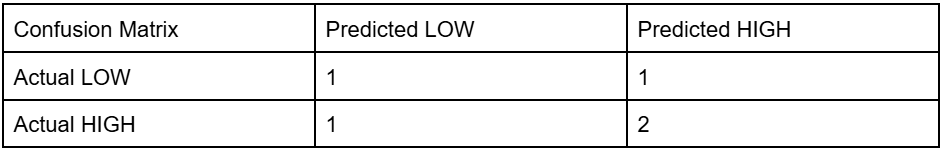

8.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

ground_truth = ["HIGH", "HIGH", "HIGH", "LOW", "LOW"]
predictions = ["LOW", "HIGH", "HIGH", "LOW", "HIGH"]

conf_matrix = confusion_matrix(ground_truth, predictions, labels=["LOW", "HIGH"])

conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=["Actual LOW", "Actual HIGH"],
    columns=["Predicted LOW", "Predicted HIGH"]
)

conf_matrix_df

,Predicted LOW,Predicted HIGH
Actual LOW,1,1
Actual HIGH,1,2


All the answers are the same.

Part 3.

9.

Motor Vehicles

In [ ]:
import numpy as np
import pandas as pd

from google.colab import files
files.upload()

Saving motor_vehicles.csv to motor_vehicles.csv


{'motor_vehicles.csv': b'fuel_efficiency,maintenance,doors,type,size,safety,RATING\r\nexcellent,vhigh,two,sports,small,low,JUNK\r\nexcellent,vhigh,two,sports,small,med,JUNK\r\nexcellent,vhigh,two,sports,small,high,JUNK\r\nexcellent,vhigh,two,sports,med,low,JUNK\r\nexcellent,vhigh,two,sports,med,med,JUNK\r\nexcellent,vhigh,two,sports,med,high,JUNK\r\nexcellent,vhigh,two,sports,big,low,JUNK\r\nexcellent,vhigh,two,sports,big,med,JUNK\r\nexcellent,vhigh,two,sports,big,high,JUNK\r\nexcellent,vhigh,two,sedan,small,low,JUNK\r\nexcellent,vhigh,two,sedan,small,med,JUNK\r\nexcellent,vhigh,two,sedan,small,high,JUNK\r\nexcellent,vhigh,two,sedan,med,low,JUNK\r\nexcellent,vhigh,two,sedan,med,med,JUNK\r\nexcellent,vhigh,two,sedan,med,high,JUNK\r\nexcellent,vhigh,two,sedan,big,low,JUNK\r\nexcellent,vhigh,two,sedan,big,med,JUNK\r\nexcellent,vhigh,two,sedan,big,high,JUNK\r\nexcellent,vhigh,two,wagon,small,low,JUNK\r\nexcellent,vhigh,two,wagon,small,med,JUNK\r\nexcellent,vhigh,two,wagon,small,high,JUNK\r

In [ ]:
carData = pd.read_csv('motor_vehicles.csv')
print(carData.shape)  # gives a tuple with the shape of data frame

(1728, 7)


In [ ]:
print(carData.head())

  fuel_efficiency maintenance doors    type   size safety RATING
0       excellent       vhigh   two  sports  small    low   JUNK
1       excellent       vhigh   two  sports  small    med   JUNK
2       excellent       vhigh   two  sports  small   high   JUNK
3       excellent       vhigh   two  sports    med    low   JUNK
4       excellent       vhigh   two  sports    med    med   JUNK


In [ ]:
splitRatio = .85

In [ ]:
fuel_efficiency_labels = ['excellent', 'good', 'med', 'crap']
maintenance_labels = ['vhigh', 'high', 'med', 'low']
doors_labels = ['two', 'three', 'four', 'many']
type_labels = ['sports', 'sedan', 'wagon']
size_labels = ['small', 'med', 'big']
safety_labels = ['low', 'med', 'high']

In [ ]:
reCarData = carData.reindex(np.random.permutation(carData.index))
shuffCarData = reCarData.reset_index()

In [ ]:
shuffCarData

,index,fuel_efficiency,maintenance,doors,type,size,safety,RATING
0,536,good,vhigh,many,wagon,med,high,JUNK
1,860,good,low,many,wagon,med,high,OKAY
2,36,excellent,vhigh,three,sedan,small,low,JUNK
3,1229,med,low,three,sedan,med,high,good
4,521,good,vhigh,many,sports,big,high,JUNK
...,...,...,...,...,...,...,...,...
1723,279,excellent,med,four,sedan,small,low,JUNK
1724,307,excellent,med,many,sedan,small,med,JUNK
1725,53,excellent,vhigh,three,wagon,big,high,JUNK
1726,254,excellent,med,three,sedan,small,high,OKAY


In [ ]:
# function definition: getting the counts (frequencies of occurrence)
def count(data,colname,label,target):    # for whichever data set, pick a column and one value in that column
                                         # and an output label (target) to compare against
    condition = (data[colname] == label) & (data['RATING'] == target)
    print(data[condition])
    return len(data[condition])

In [ ]:
# list of predicted values
predicted = []

# dictionary to store probabilities
probabilities = {0:{},1:{}}

#length of current training set
train_len = int(splitRatio * len(shuffCarData))
print(train_len)

#splitting the data into training and test sets
training = shuffCarData.iloc[:train_len,:] # the first train_len rows, all columns

1468


In [ ]:
# debugging step: looking at the training set
training

,index,fuel_efficiency,maintenance,doors,type,size,safety,RATING
0,536,good,vhigh,many,wagon,med,high,JUNK
1,860,good,low,many,wagon,med,high,OKAY
2,36,excellent,vhigh,three,sedan,small,low,JUNK
3,1229,med,low,three,sedan,med,high,good
4,521,good,vhigh,many,sports,big,high,JUNK
...,...,...,...,...,...,...,...,...
1463,1101,med,med,two,wagon,med,low,JUNK
1464,861,good,low,many,wagon,big,low,JUNK
1465,1481,crap,high,four,wagon,med,high,DANK
1466,761,good,low,two,sports,med,high,JUNK


In [ ]:
test_X = shuffCarData.iloc[train_len:,:-1] # features in the test set
test_y = shuffCarData.iloc[train_len:,-1]  # targets (the last entry in each row; i.e., the last column)

In [ ]:
# debugging
print(test_X)

      index fuel_efficiency maintenance  doors    type   size safety
1468    546            good        high    two  sports    big    low
1469   1171             med         med   many   sedan  small    med
1470   1237             med         low  three   wagon    med    med
1471   1021             med        high  three   wagon    med    med
1472   1035             med        high   four   sedan  small    low
...     ...             ...         ...    ...     ...    ...    ...
1723    279       excellent         med   four   sedan  small    low
1724    307       excellent         med   many   sedan  small    med
1725     53       excellent       vhigh  three   wagon    big   high
1726    254       excellent         med  three   sedan  small   high
1727   1075             med        high   many   wagon    med    med

[260 rows x 7 columns]


In [ ]:
# debugging
print(test_y)

1468    JUNK
1469    OKAY
1470    good
1471    OKAY
1472    JUNK
        ... 
1723    JUNK
1724    JUNK
1725    JUNK
1726    OKAY
1727    OKAY
Name: RATING, Length: 260, dtype: object


In [ ]:
# checking for dimension match
print(test_X.shape)
print(test_y.shape)

(260, 7)
(260,)


In [ ]:
# counts of prior 'LOW' and 'HIGH' labels (targets)
count_JUNK = count(training, 'RATING', 'JUNK', 'JUNK')
count_OKAY = count(training, 'RATING', 'OKAY', 'OKAY')

prior_JUNK = count_JUNK / len(training)
prior_OKAY = count_OKAY / len(training)

print('The prior \'JUNK\' count is', count_JUNK)
print('and \'OKAY\',',count_OKAY, '.')
print('The prior probability of \'JUNK\' is', prior_JUNK)
print('and of \'OKAY\',', prior_OKAY, '.')

      index fuel_efficiency maintenance  doors    type   size safety RATING
0       536            good       vhigh   many   wagon    med   high   JUNK
2        36       excellent       vhigh  three   sedan  small    low   JUNK
4       521            good       vhigh   many  sports    big   high   JUNK
5      1139             med         med   four  sports    med   high   JUNK
7       129       excellent        high    two   wagon    med    low   JUNK
...     ...             ...         ...    ...     ...    ...    ...    ...
1460    434            good       vhigh    two  sports  small   high   JUNK
1463   1101             med         med    two   wagon    med    low   JUNK
1464    861            good         low   many   wagon    big    low   JUNK
1466    761            good         low    two  sports    med   high   JUNK
1467   1122             med         med  three   sedan    big    low   JUNK

[1041 rows x 8 columns]
      index fuel_efficiency maintenance  doors   type   size sa

In [ ]:
# TRAINING: learning the priors and class-conditionals from the training set
for col in training.columns[:-1]:
    probabilities[0][col] = {}
    probabilities[1][col] = {}

    if col == "price":
        for k in price_labels:
            count_k_JUNK = count(training, col, k, 'JUNK')
            count_k_OKAY = count(training, col, k, 'OKAY')
            probabilities[0][col][k] = count_k_JUNK / count_JUNK
            probabilities[1][col][k] = count_k_OKAY / count_OKAY
            probabilities[0][col][k] += 0.001 # throwing in a quick-and-dirty approximation of the
            probabilities[1][col][k] += 0.001 # "m estimate" for avoiding zeros in the product
    else:
        if col == "maint_cost":
            for k in maint_labels:
                count_k_JUNK = count(training, col, k, 'JUNK')
                count_k_OKAY = count(training, col, k, 'OKAY')
                probabilities[0][col][k] = count_k_JUNK / count_JUNK
                probabilities[1][col][k] = count_k_OKAY / count_OKAY
                probabilities[0][col][k] += 0.001 # throwing in a quick-and-dirty approximation of the
                probabilities[1][col][k] += 0.001 # "m estimate" for avoiding zeros in the product
        else:
            if col == "trunk":
                for k in trunk_labels:
                    count_k_JUNK = count(training, col, k, 'JUNK')
                    count_k_OKAY = count(training, col, k, 'OKAY')
                    probabilities[0][col][k] = count_k_JUNK / count_JUNK
                    probabilities[1][col][k] = count_k_OKAY / count_OKAY
                    probabilities[0][col][k] += 0.001 # throwing in a quick-and-dirty approximation of the
                    probabilities[1][col][k] += 0.001 # "m estimate" for avoiding zeros in the product
            else:
                for k in safety_labels:
                    count_k_JUNK = count(training, col, k, 'JUNK')
                    count_k_OKAY = count(training, col, k, 'OKAY')
                    probabilities[0][col][k] = count_k_JUNK / count_JUNK
                    probabilities[1][col][k] = count_k_OKAY / count_OKAY
                    probabilities[0][col][k] += 0.001 # throwing in a quick-and-dirty approximation of the
                    probabilities[1][col][k] += 0.001 # "m estimate" for avoiding zeros in the product

Empty DataFrame
Columns: [index, fuel_efficiency, maintenance, doors, type, size, safety, RATING]
Index: []
Empty DataFrame
Columns: [index, fuel_efficiency, maintenance, doors, type, size, safety, RATING]
Index: []
Empty DataFrame
Columns: [index, fuel_efficiency, maintenance, doors, type, size, safety, RATING]
Index: []
Empty DataFrame
Columns: [index, fuel_efficiency, maintenance, doors, type, size, safety, RATING]
Index: []
Empty DataFrame
Columns: [index, fuel_efficiency, maintenance, doors, type, size, safety, RATING]
Index: []
Empty DataFrame
Columns: [index, fuel_efficiency, maintenance, doors, type, size, safety, RATING]
Index: []
Empty DataFrame
Columns: [index, fuel_efficiency, maintenance, doors, type, size, safety, RATING]
Index: []
Empty DataFrame
Columns: [index, fuel_efficiency, maintenance, doors, type, size, safety, RATING]
Index: []
      index fuel_efficiency maintenance  doors    type size safety RATING
5      1139             med         med   four  sports  med   

In [ ]:
import pprint

# Sample dictionary for demonstration
pp = pprint.PrettyPrinter(indent=4)

# Format each value in the nested dictionaries and print
formatted_probabilities = {
    key: {inner_key: {sub_key: "{:.3f}".format(sub_value) for sub_key, sub_value in inner_value.items()}
           for inner_key, inner_value in value.items()}
    for key, value in probabilities.items()
}

pp.pprint(formatted_probabilities)

{   0: {   'doors': {'high': '0.001', 'low': '0.001', 'med': '0.001'},
           'fuel_efficiency': {'high': '0.001', 'low': '0.001', 'med': '0.229'},
           'index': {'high': '0.001', 'low': '0.001', 'med': '0.001'},
           'maintenance': {'high': '0.257', 'low': '0.221', 'med': '0.227'},
           'safety': {'high': '0.230', 'low': '0.478', 'med': '0.295'},
           'size': {'high': '0.001', 'low': '0.001', 'med': '0.329'},
           'type': {'high': '0.001', 'low': '0.001', 'med': '0.001'}},
    1: {   'doors': {'high': '0.001', 'low': '0.001', 'med': '0.001'},
           'fuel_efficiency': {'high': '0.001', 'low': '0.001', 'med': '0.296'},
           'index': {'high': '0.001', 'low': '0.001', 'med': '0.001'},
           'maintenance': {'high': '0.280', 'low': '0.223', 'med': '0.309'},
           'safety': {'high': '0.528', 'low': '0.001', 'med': '0.474'},
           'size': {'high': '0.001', 'low': '0.001', 'med': '0.344'},
           'type': {'high': '0.001', 'low': '

In [ ]:
# TESTING: reading rows from the test set, checking the value of each feature and comparing with the target outcome
for row in range(len(test_X)):
    prod_JUNK = prior_JUNK
    prod_OKAY = prior_OKAY

    for feature in test_X.columns:
        # Check if the feature value exists in the probabilities dictionary:
        if test_X[feature].iloc[row] in probabilities[0][feature]:
            prod_JUNK *= probabilities[0][feature][test_X[feature].iloc[row]]
        else:
            prod_JUNK *= 0  # or some default value if the feature value is not found

        if test_X[feature].iloc[row] in probabilities[1][feature]:
            prod_OKAY *= probabilities[1][feature][test_X[feature].iloc[row]]
        else:
            prod_OKAY *= 0  # or some default value if the feature value is not found

    # predicting the outcome
    if prod_JUNK > prod_OKAY:
        predicted.append('JUNK')
    else:
        predicted.append('OKAY')

# Initialize correct and incorrect counts outside the loop
correct = 0
incorrect = 0

for j in range(len(test_y)):
    if predicted[j] == 'JUNK':
        if test_y.iloc[j] == 'JUNK':
            correct += 1
        else:
            incorrect += 1
    else:
        if test_y.iloc[j] == 'JUNK':
            incorrect += 1  # This should be incorrect since predicted is 'HIGH'
        else:
            correct += 1  # This should be correct since predicted is 'HIGH'

print('The accuracy is', correct / (correct + incorrect))

The accuracy is 0.35


10. As stated, Caleb did most of the calcuations in Part 1 while I did most of the code in Part 2 and 3.We both verified each other's work to insure everything is good.